In [1]:
%run preamble_2.py
%matplotlib inline

!mkdir -p images tables results

from IPython.display import HTML

In [2]:
#
# Simulated Data
#
DS_NAME ="Simulated Latencies"

N = 1000
batches_sim = [0]*N
for i in range(N):
    batch_size = np.random.geometric(.001)
    batches_sim[i] = [0] * batch_size
    for j in range(batch_size):
        a = np.random.uniform(.5, 5)
        s = np.random.exponential(0.1)
        x = np.random.exponential(0.01)
        batches_sim[i][j] = x + s*np.random.pareto(a)       

DS_DATA = batches_sim
DS_QUANTILES = [0, .25, 0.5, 0.75, .9, .95, .99, .995, .999, .9999, .99999, 1 ]

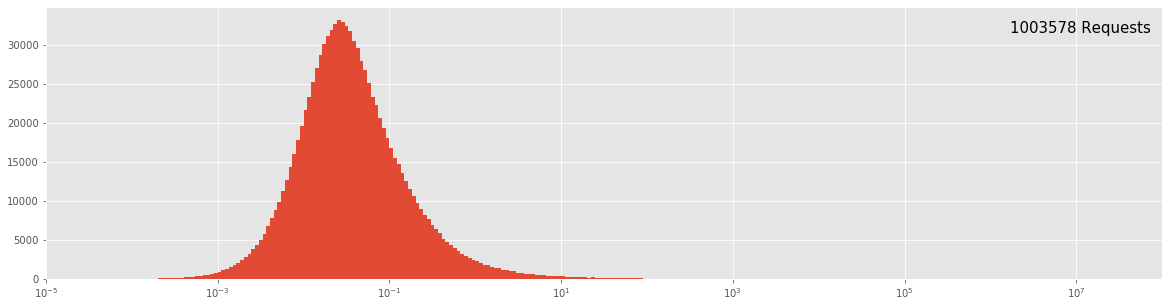

In [3]:
total = np.concatenate(DS_DATA)
ax = log_plot(total, [], xmin=1e-5, xmax=1e8)
# plt.savefig("images/" + DS_NAME + "_distribution")

In [20]:
# Run Configuration

# HDR
CLASSES[2].M = 10**10

# Prom
CLASSES[6].thresholds = np.array([ 0, 1, 10, 100, 1000, 5000, 10000, 200000, 50000, 800000, 1000000 ])

METHODS_SEL = [
 'exact',
 'prom',
 'hdr',
 'tdigest',
 'dd',
 'circllhist/type-7',
]
METHODS_RENAME = { 'circllhist/type-7' : "circllhist" }

In [5]:
STATS = evaluate_all(DS_DATA, DS_QUANTILES)

# exact
Insert .........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [21]:
# reevaluate(STATS, "prom", DS_DATA, DS_QUANTILES)

# prom
Insert ..........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [22]:
save(json.dumps(STATS), "results/" + DS_NAME + ".json")

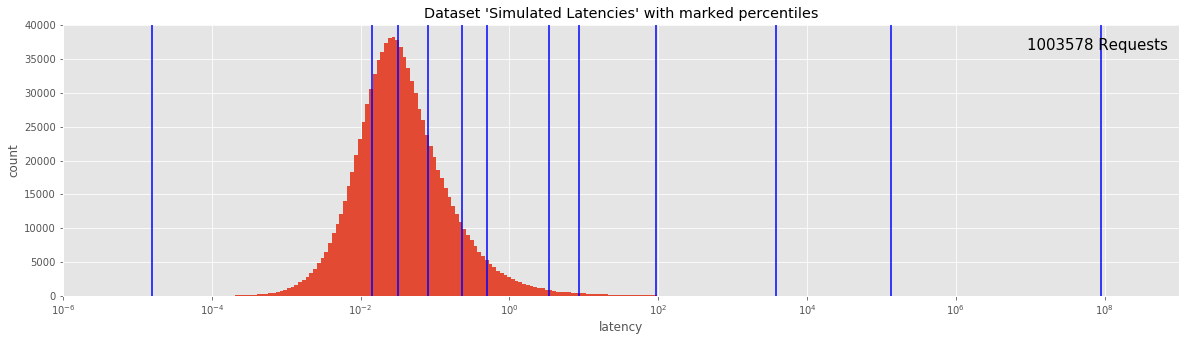

In [7]:
log_plot(total, [STATS["exact"]["quantiles"][q] for q in DS_QUANTILES ], xmin=1e-6, xmax=1e9)
plt.ylabel("count")
plt.xlabel("latency")
plt.title("Dataset '{}' with marked percentiles".format(DS_NAME))
plt.savefig("images/" + DS_NAME + "_distribution_percentiles", bbox_inches="tight")

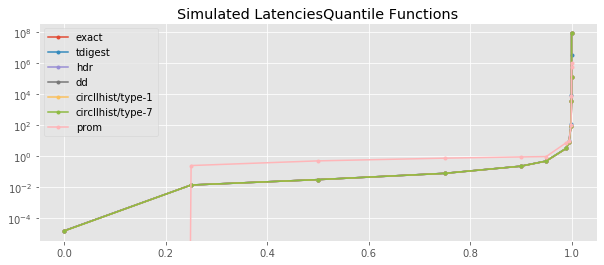

In [8]:
#
# Stats: Quantiles
#
df = stats_quantiles(STATS)[METHODS_SEL]

# save(df.to_latex(), "tables/" + DS_NAME + "_quantiles.tex")

plt.figure(figsize=(10,4))
plt.title(DS_NAME + "Quantile Functions")
for name in METHODS:
    plt.plot(DS_QUANTILES, [ STATS[name]["quantiles"][q] for q in DS_QUANTILES ] ,".-")

plt.legend(METHODS)
plt.yscale("log")
# plt.savefig("images/" + DS_NAME + "_quantile_comparison")

In [9]:
df

,exact,prom,hdr,tdigest,dd,circllhist/type-7
q0,1.583411e-05,0.000000,1.583360e-05,1.583411e-05,1.583411e-05,1.550000e-05
q.25,1.422763e-02,0.257004,1.423442e-02,1.424767e-02,1.426150e-02,1.423643e-02
q.5,3.166330e-02,0.514008,3.166700e-02,3.168511e-02,3.174040e-02,3.167246e-02
q.75,8.048736e-02,0.771012,8.053064e-02,8.056890e-02,8.125738e-02,8.050000e-02
q.9,2.332746e-01,0.925214,2.334130e-01,2.340721e-01,2.345472e-01,2.332948e-01
q.95,5.001537e-01,0.976615,5.003805e-01,5.042192e-01,5.015395e-01,5.001749e-01
q.99,3.350544e+00,7.825580,3.352088e+00,3.489660e+00,3.353452e+00,3.352521e+00
q.995,8.641148e+00,9.803723,8.643622e+00,9.527658e+00,8.585044e+00,8.640426e+00
q.999,9.325152e+01,98.973286,9.325448e+01,1.270286e+02,9.276793e+01,9.325000e+01
q.9999,3.775303e+03,8059.632927,3.848291e+03,9.400502e+03,3.752676e+03,3.750000e+03


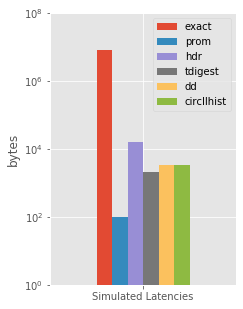

In [30]:
#
# Stats: Size
#
df = stats_size(STATS)[METHODS_SEL].rename(METHODS_RENAME, axis=1).rename({"bsize" : DS_NAME })

save(df.to_latex(), "tables/" + DS_NAME + "_size.tex")

fig = plt.figure(figsize=(10/3,5))
ax = plt.subplot(1,1,1)
df.plot(kind="bar", ax=ax)
plt.title("")
plt.yscale("log")
plt.ylabel("bytes")
plt.xticks(rotation=0)
plt.ylim(1, 10**8)
plt.savefig("images/" + DS_NAME + "_size", bbox_inches = "tight")

In [31]:
df

,exact,prom,hdr,tdigest,dd,circllhist
Simulated Latencies,8028624,96,16455.0,2096,3428,3396.0


In [32]:
[10**k for k in range(-9,1,1) ]

[1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]

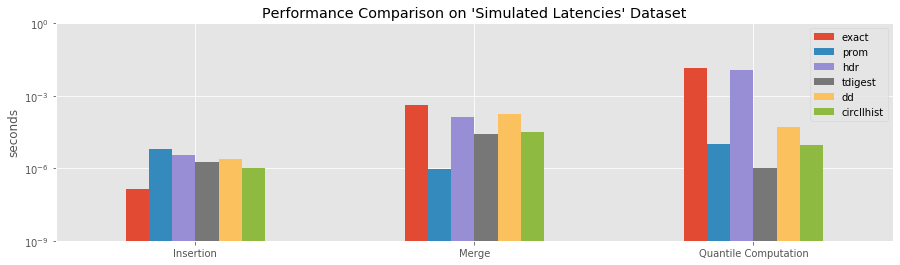

In [33]:
#
# Stast: Timing
#
df = stats_timing(STATS)[METHODS_SEL].rename(METHODS_RENAME, axis=1)

df.rename({ "insert" : "Insertion" , "merge" : "Merge", "quantiles" : "Quantile Computation" },inplace=True)

# table in usec
(df*10**6).to_latex("tables/" + DS_NAME + "_perf.tex", float_format = "%.1f")

fig = plt.figure(figsize=(15, 4))
ax = plt.subplot(1,1,1)
df.plot(kind="bar", ax=ax)
plt.yscale("log")
plt.ylabel("seconds")
plt.ylim(1e-9, 1e0)
plt.yticks([10**k for k in range(-9,1,3)])
plt.title("Performance Comparison on '{}' Dataset".format(DS_NAME))
plt.xticks(rotation=0)
plt.savefig("images/" + DS_NAME + "_perf", bbox_inches = "tight")

In [34]:
df

,exact,prom,hdr,tdigest,dd,circllhist
Insertion,1.376135e-07,6.489667e-06,0.000003,0.000002,0.000003,0.000001
Merge,4.154061e-04,9.527259e-07,0.000136,0.000027,0.000186,0.000032
Quantile Computation,1.422245e-02,1.004074e-05,0.011198,0.000001,0.000051,0.000009


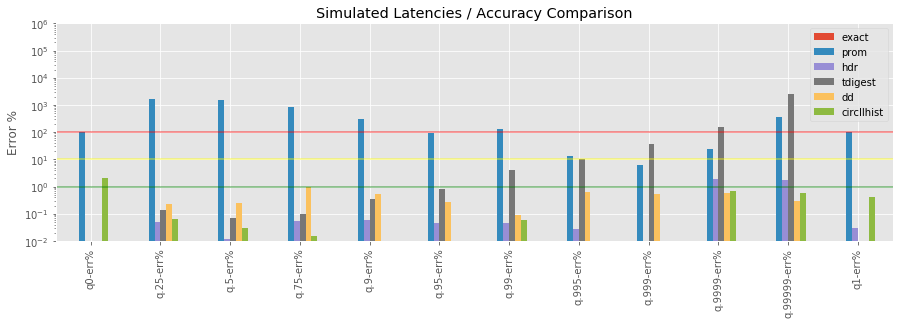

In [35]:
#
# Stats: Accuracy
#
df = stats_qerr(STATS)[METHODS_SEL].rename({ "circllhist/type-7" : "circllhist" }, axis=1)

METHODS_TBL = list(df.columns)
METHODS_TBL.remove("exact")
df[METHODS_TBL].to_latex("tables/" + DS_NAME + "_accuracy.tex", float_format="%.3f")


fig = plt.figure(figsize=(15, 4))
ax = plt.subplot(1,1,1)
plt.title(DS_NAME + " / Accuracy Comparison")
ax.axhline(1, alpha=0.5, color="green")
ax.axhline(10, alpha=0.5, color="yellow")
ax.axhline(100, alpha=0.5, color="red")
df.plot(kind="bar", ax=ax)
plt.legend(loc="upper right")
plt.yscale("log")
plt.ylabel("Error %")
plt.ylim(1e-2, 1e6)
plt.savefig("images/" + DS_NAME + "_accuracy", bbox_inches="tight")

In [36]:
df

,exact,prom,hdr,tdigest,dd,circllhist
q0-err%,0.0,100.000000,0.003211,0.000000,0.000000,2.110056
q.25-err%,0.0,1706.372011,0.047689,0.140798,0.238030,0.061839
q.5-err%,0.0,1523.355617,0.011662,0.068886,0.243487,0.028913
q.75-err%,0.0,857.929298,0.053769,0.101305,0.956693,0.015705
q.9-err%,0.0,296.620225,0.059320,0.341869,0.545530,0.008642
q.95-err%,0.0,95.263028,0.045346,0.812855,0.277072,0.004238
q.99-err%,0.0,133.561461,0.046075,4.152054,0.086799,0.059006
q.995-err%,0.0,13.453937,0.028625,10.259170,0.649262,0.008362
q.999-err%,0.0,6.135847,0.003175,36.221437,0.518582,0.001626
q.9999-err%,0.0,23.153663,1.933290,148.999933,0.599358,0.670228
